https://medium.com/@DeepthiTabithaBennet/the-bias-variance-tradeoff-a-newbies-guide-by-a-newbie-95fb03dbebcb

In [3]:
import numpy as np
from numpy import polyfit
from numpy import polyval
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def f(x):
    return np.sin(x * np.pi)

In [3]:
def error_function(pred, actual):
    return (pred - actual) ** 2

In [4]:
np.random.seed(120)
n_observations_per_dataset = 25
n_datasets = 1000
max_poly_degree = 12  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

In [6]:
NOISE_STD = .5
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

In [7]:
x = np.linspace(-1, 1, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

In [8]:
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

In [9]:
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        
        # Train model
        tmp_theta_hat = polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))

In [10]:
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)

    return np.mean((average_model_prediction - f(x_test)) ** 2)

In [11]:
def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)
    
    return np.mean((pred_test - average_model_prediction) ** 2)

In [12]:
complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

Text(0.5, 1.0, 'Bias-Variance Tradeoff')

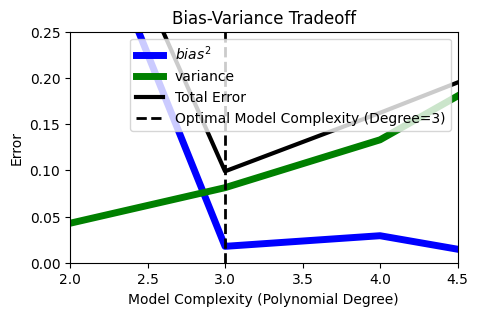

In [15]:

plt.figure(figsize=(5, 3))
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$', linewidth=5)
plt.plot(model_poly_degrees, variance, color='green', label='variance', linewidth=5)
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance), linewidth=3, color='black', label='Total Error')
plt.axvline(best_model_degree, color='black', linestyle='--', linewidth=2, label=f'Optimal Model Complexity (Degree={best_model_degree})')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.ylim([0, .25])
plt.xlim([2, 4.5])
plt.legend()
plt.title('Bias-Variance Tradeoff')

https://spotintelligence.com/2023/04/11/bias-variance-trade-off/

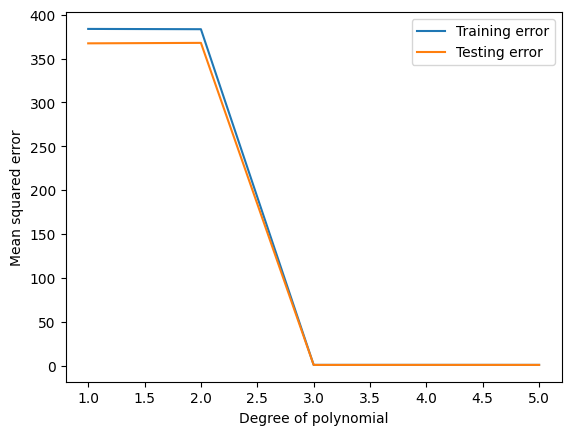

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate some synthetic data with a non-linear relationship
np.random.seed(0)
x = np.linspace(-5, 5, num=100)
y = x ** 3 + np.random.normal(size=100)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fit polynomial regression models with different degrees of polynomials
degrees = [1, 2, 3, 4, 5]
train_errors, test_errors = [], []
for degree in degrees:

    # Transform the features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
    x_poly_test = poly_features.transform(x_test.reshape(-1, 1))

    # Fit the linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    # Evaluate the model on the training and testing data
    y_pred_train = model.predict(x_poly_train)
    y_pred_test = model.predict(x_poly_test)
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and testing errors as a function of the degree of polynomial

plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, test_errors, label='Testing error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.show()
